# ¡Hola Raul! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

---

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Raul excelente trabajo completando este proyecto! Has demostrado habilidades destacables en análisis exploratorio y visualización efectiva de datos. Además, tu capacidad para formular y verificar hipótesis estadísticas fue sólida y precisa, mostrando un fuerte dominio en el análisis crítico necesario para la toma de decisiones estratégicas. En general, desarrollaste un muy buen análisis en este caso de estudio, sigue manteniendo esta combinación de habilidades técnicas, analíticas y estratégicas en tus futuros proyectos.

¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

----

 # Sprint 6: Proyecto integrado

## Introduccion

### Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

### Proposito del proyecto y plan de solución

* Se llevará a cabo un estudio de tarifas utilizando una muestra acotada de 500 usuarios de Megaline durante 2018
 * identidad,
 * lugar de origen,
 * tarifa contratada,
 * número de llamadas realizadas
 * mensajes de texto enviados
 * mb consumidos, etc

* La misión es examinar el comportamiento de los clientes para identificar qué plan, mediante análisis estadístico, genera más ingresos, mediante el uso de las siguientes herramientas
 * graficas de barras
 * histogramas
 * diagramas de caja
 * promedio
 * varianza
 * pruebas de hipotesis estadistica

## Paso 1: Abre el archivo de datos y estudia la información general

### Diccionario de datos

* En este proyecto, se trabajara con una tabla
* Es posible que los datos de 2016 estén incompletos.

#### Tabla games:

0. **Name**: Nombre
1. **Platform**: Plataforma
2. **Year_of_Release**: Año de lanzamiento
3. **Genre**: Género
4. **NA_sales**: ventas en Norteamérica en millones de dólares estadounidenses
5. **EU_sales**: ventas en Europa en millones de dólares estadounidenses
6. **JP_sales**: ventas en Japón en millones de dólares estadounidenses
7. **Other_sales**: ventas en otros países en millones de dólares estadounidenses
8. **Critic_Score**: máximo de 100
9. **User_Score**: máximo de 10
10. **Rating**: ESRB

### Inicialización

#### Cargar todas las librerías

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

#### Cargar datos

In [2]:
# Se cargan los datos originales en el dataframe df_g
df_g = pd.read_csv('/datasets/games.csv')

# Se crea un nuevo dataframe el cual llevara las correcciones 
df_g_c = df_g.copy()

## Paso 2: Preparar los datos

* Reemplaza los nombres de las columnas (ponlos en minúsculas).
* Convierte los datos en los tipos necesarios.
* Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
* Si es necesario, elige la manera de tratar los valores ausentes:
 * Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
 * ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
 * Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
* Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

### Previsualizacion

#### Imprime la información general/resumida sobre el DataFrame

In [3]:
# Despliegue resumen conciso del dataframe
df_g.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Imprime una muestra de los datos

In [4]:
# Muestra de los datos contenidos en el dataframe
display( df_g.sample(5) )

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9406,Tales of the Heroes: Twin Brave,PSP,2012.0,Role-Playing,0.00,0.00,0.13,0.00,NaN,NaN,NaN
14466,Dr. Muto,GC,2002.0,Platform,0.02,0.01,0.00,0.00,63.0,tbd,T
15332,Mata Hari: Betrayal is only a Kiss Away,PC,2008.0,Adventure,0.00,0.02,0.00,0.00,63.0,NaN,T
11186,The Ant Bully,Wii,2006.0,Platform,0.08,0.00,0.00,0.01,45.0,1.4,E10+
8193,Velvet Assassin,X360,2009.0,Shooter,0.14,0.02,0.01,0.01,56.0,7.1,M


---
**Problemas obvios encontrados**

* Los nombres de las columnas tienen mayusculas
* Las columnas: Name, Year_of_Release, Genre, Critic_Score, User_Score, y Rating tienen valores nulos
* La columna year_of_release y User_Score  tienen el tipo de dato cambiado
---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `sample`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

</div>

### Correccion de datos

#### Nombres de columnas de mayusculas a minusculas

In [5]:
# Cambio de caracteres de nombre de columnas de mayusculas a minusculas
df_g_c.columns = df_g_c.columns.str.lower()
display( df_g_c.head() )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


---
**Correcciones y otros hallazgos**

* Se corrigio exitosamente el nombre de las columnas al cambiar todas las letras a minusculas
---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo ajustando los nombres de lsa columnas, esto facilitará la manipulación de la base de datos.

</div>

#### Gestion valores ausentes

##### Gestion valores ausentes columna 'name'

In [6]:
# Se sustituyen los datos ausentes en la columna 'name' por la palabra: unknown
df_g_c['name'].fillna('unknown', inplace=True)
print('Numero de valores ausentes:')
print('  * Antes de la sustitucion:  ', df_g['Name'].isna().sum())
print('  * Despues de la sustitucion:', df_g_c['name'].isna().sum())

Numero de valores ausentes:
  * Antes de la sustitucion:   2
  * Despues de la sustitucion: 0


---
**Correcciones y otros hallazgos**

* Se corrigieron exitosamente 2 valores ausentes en la columna 'name' al sustituirlos por el valor: 'unknown'
* Se escogio este valor para que funcione como etiqueta facilmente reconocible
---

##### Gestion valores ausentes columna 'year_of_release'

In [7]:
# Se sustituyen los datos ausentes en la columna 'year_of_release' por el numero: 1900
df_g_c['year_of_release'].fillna(1900, inplace=True)
print('Numero de valores ausentes:')
print('  * Antes de la sustitucion:  ', df_g['Year_of_Release'].isna().sum())
print('  * Despues de la sustitucion:', df_g_c['year_of_release'].isna().sum())

Numero de valores ausentes:
  * Antes de la sustitucion:   269
  * Despues de la sustitucion: 0


---
**Correcciones y otros hallazgos**

* Se corrigieron exitosamente 269 valores ausentes en la columna 'year_of_release' al sustituirlos por el valor: 1900
* Esto se realizo para poder contar con un valor tipo etiqueta facilmente identificable
---

##### Gestion valores ausentes columna 'genre'

In [8]:
# Se sustituyen los datos ausentes en la columna 'genre' por la palabra: unknown
df_g_c['genre'].fillna('unknown', inplace=True)
print('Numero de valores ausentes:')
print('  * Antes de la sustitucion:  ', df_g['Genre'].isna().sum())
print('  * Despues de la sustitucion:', df_g_c['genre'].isna().sum())

Numero de valores ausentes:
  * Antes de la sustitucion:   2
  * Despues de la sustitucion: 0


---
**Correcciones y otros hallazgos**

* Se corrigieron exitosamente 2 valores ausentes en la columna 'genre' al sustituirlos por el valor: 'unknown'
* Se escogio este valor para que funcione como etiqueta facilmente reconocible
---

##### Gestion valores ausentes columna 'critic_score'

In [9]:
# Se sustituyen los datos ausentes en la columna 'critic_score' por el valor: -1
df_g_c['critic_score'].fillna(-1, inplace=True)
print('Numero de valores ausentes:')
print('  * Antes de la sustitucion:  ', df_g['Critic_Score'].isna().sum())
print('  * Despues de la sustitucion:', df_g_c['critic_score'].isna().sum())

Numero de valores ausentes:
  * Antes de la sustitucion:   8578
  * Despues de la sustitucion: 0


---
**Correcciones y otros hallazgos**

* Se corrigieron exitosamene 8,578 valores ausentes en la columna 'critic_score' al sustituirlos por el valor: -1
* Se escogio este valor para que funcione como etiqueta facilmente reconocible
---

##### Gestion valores ausentes columna 'user_score'

In [10]:
# Se crea columna 'user_score_tbd' que almacena valores tbd contenidos en columna 'user_score'
df_g_c['user_score_tbd'] = df_g['User_Score']=='tbd'
display( df_g_c.head() )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_tbd
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,False
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN,False
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,False
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN,False


---
**Enriquecimiento de datos**

* Se creo una columna especifica para contener los valores 'tbd' que se llama 'user_score_tbd' y su data type es: bool
---

In [11]:
# Se sustituyen los valores 'tbd' de la columna 'user_score' por el valor '-1'
df_g_c['user_score'].replace('tbd', '-1', inplace=True)
display( df_g_c[df_g_c['user_score']=='-1'].head() )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_tbd
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,-1,E,True
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,-1,E10+,True
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,-1,T,True
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,-1,E,True
657,Frogger's Adventures: Temple of the Frog,GBA,1900.0,Adventure,2.15,0.18,0.0,0.07,73.0,-1,E,True


In [12]:
# Se sustituyen los datos ausentes en la columna 'user_score' por el caracter: '-1'
df_g_c['user_score'].fillna('-1', inplace=True)
print('Numero de valores ausentes:')
print('  * Antes de la sustitucion:  ', df_g['User_Score'].isna().sum())
print('  * Despues de la sustitucion:', df_g_c['user_score'].isna().sum())

Numero de valores ausentes:
  * Antes de la sustitucion:   6701
  * Despues de la sustitucion: 0


---
**Correcciones y otros hallazgos**

* Los valores 'tbd' de la columna 'user_score' se transformaron a -1
* Se corrigieron exitosamente 6,701 valores ausentes en la columna 'user_score' al sustituirlos por el valor: '-1'
* Se escogio este valor para que funcione como etiqueta facilmente reconocible
---

##### Gestion valores ausentes columna 'rating'

In [13]:
# Se sustituyen los datos ausentes en la columna 'rating' por la palabra: unknown
df_g_c['rating'].fillna('unknown', inplace=True)
print('Numero de valores ausentes:')
print('  * Antes de la sustitucion:  ', df_g['Rating'].isna().sum())
print('  * Despues de la sustitucion:', df_g_c['rating'].isna().sum())

Numero de valores ausentes:
  * Antes de la sustitucion:   6766
  * Despues de la sustitucion: 0


---
**Correcciones y otros hallazgos**

* Se corrigieron exitosamente 6,766 valores ausentes en la columna 'rating' al sustituirlos por la etiqueta 'unknown'
* Se escogio este valor para que funcione como etiqueta facilmente reconocible
---

#### Conversion de tipos de datos

##### Conversion de tipos de datos columna 'year_of_release'

In [14]:
# Se modifica el tipo de dato de la columnas 'year_of_release' de float a date
df_g_c['year_of_release'] = pd.to_datetime(df_g_c['year_of_release'], format='%Y')
display( df_g_c.head() )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_tbd
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E,False
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,-1.0,-1,unknown,False
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E,False
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,unknown,False


---
**Correcciones y otros hallazgos**

* Se corrigio exitosamente el tipo de dato de la columna 'year_of_release' de float a date
---

##### Conversion de tipos de datos columna 'user_score'

In [15]:
# Se modifica el tipo de dato de la columna 'user_score' de object a float
df_g_c['user_score'] = df_g_c['user_score'].astype(float)
# Se muestran los tipos de dato
print( df_g_c.dtypes )

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                float64
rating                     object
user_score_tbd               bool
dtype: object


---
**Correcciones y otros hallazgos**

* Se corrigio exitosamente el tipo de dato de la columna 'user_score' de object a float
---

#### Verificacion por duplicados

In [16]:
# Se verifica por renglones duplicados
print(df_g_c.duplicated().sum())

0


---
**Correcciones y otros hallazgos**

* No se encontraron renglones duplicados
---

#### Calculo de ventas totales

In [17]:
# Calculo de ventas totales
df_g_c['total_sales'] = df_g_c['na_sales'] + df_g_c['eu_sales'] + df_g_c['jp_sales'] + df_g_c['other_sales']
display( df_g_c.head() )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_tbd,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,False,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,False,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,False,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,False,31.38


---
**Enriquecimiento de datos**

* Se creo exitosamente la columna 'total_sales' 
---

### Conclusiones generales paso 2

* Se reemplazaron exitosamente los nombres de las columnas a minusculas.
---
* Se convirtieron las siguientes columnas:
 * 'year_of_release' de float  a date: Se cambio por contar ventajas de manejo de informacion
 * 'user_score'      de object a float: Se cambio para que nos permitiese obtener calculos y estadisticas
---
* Se corrigieron los valores ausentes de las siguientes columnas:
 * 'name',                2, 'unknown', etiqueta facilmente reconocible
 * 'year_of_release',   269,     1900 , etiqueta facilmente identificable
 * 'genre',               2, 'unknown', etiqueta facilmente reconocible
 * 'critic_score',    8,578,       -1 , etiqueta facilmente reconocible  
 * 'rating',          6,766, 'unknown', etiqueta facilmente reconocible 
 * 'user_score',      6,701,       -1 , etiqueta facilmente reconocible 

* Se transformaron valores 'tbd' de columna 'user_score' a -1 , etiqueta facilmente reconocible 
---
* crecion de columna 'user_score_tdb':
 * tipo de dato: bool 
 * objetivo:     valores 'tbd'
--- 
* los datos ausentes se pueden deber a que se integraron datos de diferentes fuentes en la red, y no toda la informacion estaba disponible.
---
* Se creo columna 'total_sales' que contiene la suma de las columnas: 
 * 'na_sales'
 * 'eu_sales'
 * 'jp_sales'
 * 'other_sales'

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Con respecto al manejo de datos faltantes, las estrategias que planteas son válidas para el contexto del caso de estudio; no obstante, acá te comparto un artículo donde hablan sobre diferentes [métodos de manejo de datos faltanes](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python) que seguro te serán útiles en futuros proyectos.

</div>

## Paso 3: Analiza los datos

* Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
* Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
* Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
* Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
* ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
* Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
* Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
* Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
* Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

### Juegos lanzados por año y ventas totales por año

In [18]:
# Numero de juegos lanzados por año 
s_releases_by_year = df_g_c.groupby('year_of_release').count()['name']

# Ventas totales por año 
s_total_sales_by_year = df_g_c.groupby('year_of_release').sum()['total_sales']

# Se concatenan las series: s_releases_by_year y s_total_sales_by_year para crear un datafram
df_releases_total_sales_by_year_merge = pd.concat([s_releases_by_year, s_total_sales_by_year], axis=1)
df_releases_total_sales_by_year_merge.reset_index(level=0, inplace=True)
df_releases_total_sales_by_year_merge = df_releases_total_sales_by_year_merge.rename(
                                        columns={'name': 'releases (#)', 'total_sales': 'total_sales (M USD)'})
display( df_releases_total_sales_by_year_merge.head() )

,year_of_release,releases (#),total_sales (M USD)
0,1900-01-01,269,98.92
1,1980-01-01,9,11.38
2,1981-01-01,46,35.68
3,1982-01-01,36,28.88
4,1983-01-01,17,16.80


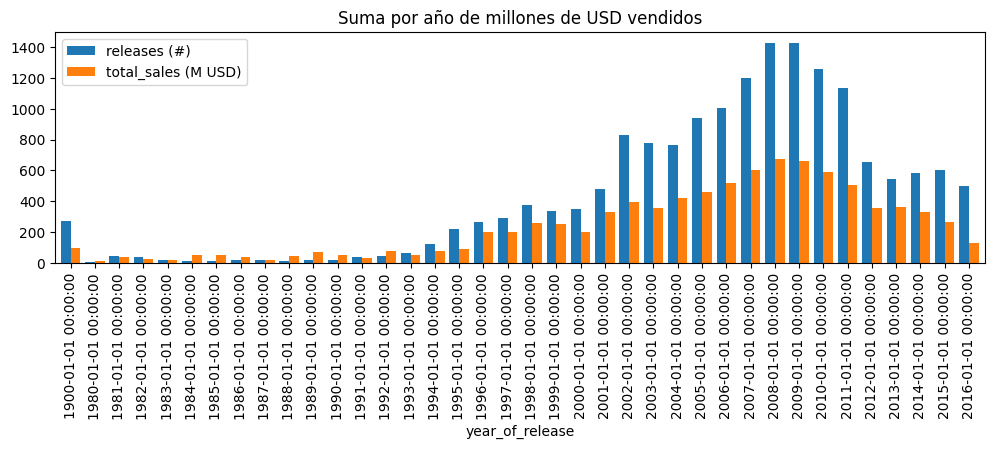

In [19]:
#Se muestra la grafica de barras
df_releases_total_sales_by_year_merge.plot(x='year_of_release',
                                           kind='bar',
                                           figsize=(12, 3),
                                           title='Suma por año de millones de USD vendidos',
                                           width=0.8)
plt.show()

---
**Observaciones**

* ¿Son significativos los datos de cada período?
 * Se puede observar que al principio la liberacion de nuevos juegos, es bastante modesta, aunque despues , se puede observar como se incrementa la produccion con el paso de los años, llegando a su maximo en 2008 y 2009 para luego ir descendiendo. La liberacion coincide proporcionalmente con las ventas totales por año
---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo Raul! La gráfica muestra un crecimiento hasta 2008-2009, seguido de una caída en lanzamientos. Esto podría deberse al éxito de consolas como PS3 y Xbox 360, y luego a cambios en la industria: más enfoque en calidad, auge de juegos móviles, distribución digital o la crisis de 2008.

</div>

### Juegos lanzados por plataforma y ventas totales por plataforma

In [20]:
# Numero de juegos lanzados por plataforma 
s_releases_by_platform = df_g_c.groupby('platform').count()['name']

# Ventas totales por plataforma 
s_total_sales_by_platform = df_g_c.groupby('platform').sum()['total_sales']

# Se concatenan las series: s_releases_by_year y s_total_sales_by_year para crear un datafram
df_releases_total_sales_by_platform_merge = pd.concat([s_releases_by_platform, s_total_sales_by_platform], axis=1)
df_releases_total_sales_by_platform_merge.reset_index(level=0, inplace=True)
df_releases_total_sales_by_platform_merge = df_releases_total_sales_by_platform_merge.rename(
                                            columns={'name': 'releases (#)', 'total_sales': 'total_sales (M USD)'})
# Ventas liberaciones por plataforma y ventas totales por plataforma en orden descendete
df_releases_total_sales_by_platform_merge_sorted= df_releases_total_sales_by_platform_merge.sort_values(by='total_sales (M USD)', ascending=False)
display( df_releases_total_sales_by_platform_merge_sorted.head() )

,platform,releases (#),total_sales (M USD)
16,PS2,2161,1255.77
28,X360,1262,971.42
17,PS3,1331,939.65
26,Wii,1320,907.51
4,DS,2151,806.12


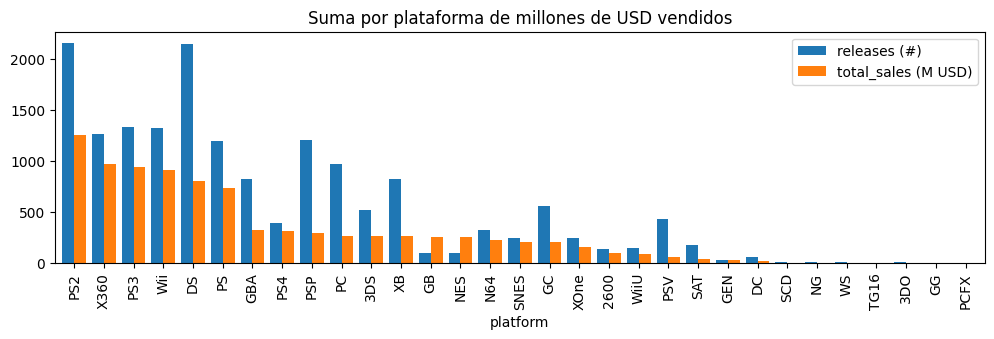

In [21]:
#Se muestra la grafica de barras
df_releases_total_sales_by_platform_merge_sorted.plot(x='platform',
                                                      kind='bar',
                                                      figsize=(12, 3),
                                                      title='Suma por plataforma de millones de USD vendidos',
                                                      width=0.8)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Perfecto! La gráfica muestra claramente que la PlayStation 2 lidera en ventas, seguida por la Xbox 360 y la PlayStation 3. También destacan la Wii, Nintendo DS y la primera PlayStation. Las consolas más antiguas o menos populares tienen ventas mucho menores, lo que refleja la preferencia del mercado por Sony y Microsoft.

</div>

#### Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

In [22]:
# Seleccion de las plataformas con mayores ventas
l_top_selling_platforms = df_releases_total_sales_by_platform_merge_sorted['platform'][0:6].tolist()
display( l_top_selling_platforms )

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [23]:
# Filtrado de dataframe en base a las plataformas con mayores ventas
df_top_selling_platforms = df_g_c[df_g_c['platform'].isin(l_top_selling_platforms)][['platform', 'year_of_release','total_sales']].copy()
display( df_top_selling_platforms.head() )

,platform,year_of_release,total_sales
0,Wii,2006-01-01,82.54
2,Wii,2008-01-01,35.52
3,Wii,2009-01-01,32.77
6,DS,2006-01-01,29.80
7,Wii,2006-01-01,28.91


In [24]:
# Se calcula la suma total por plataforma y por año
df_top_selling_platforms_sum = df_top_selling_platforms.groupby(['platform', 'year_of_release']).sum()
df_top_selling_platforms_sum = df_top_selling_platforms_sum.rename(columns={'total_sales': 't_sales_year_sum'})

# Se muestra parte del dataframe con el fin de corroborar los cambios
display( df_top_selling_platforms_sum.head() )

t_sales_year_sum
platform year_of_release                  
DS       1900-01-01                   3.34
         1985-01-01                   0.02
         2004-01-01                  17.27
         2005-01-01                 130.14
         2006-01-01                 119.81

In [25]:
# Se resetea el indice para remover el multiindice
df_top_selling_platforms_sum_reset = df_top_selling_platforms_sum.reset_index()

# Se muestra parte del dataframe con el fin de corroborar los cambios
display( df_top_selling_platforms_sum_reset.head() )

,platform,year_of_release,t_sales_year_sum
0,DS,1900-01-01,3.34
1,DS,1985-01-01,0.02
2,DS,2004-01-01,17.27
3,DS,2005-01-01,130.14
4,DS,2006-01-01,119.81


In [26]:
# Se divide el dataframe # Se divide el dataframe df_duration_avg_reset en 6 dataframes, uno por cada plataforma
df_top_selling_platforms_sum_reset_PS2 = df_top_selling_platforms_sum_reset[df_top_selling_platforms_sum_reset['platform'] == 'PS2'][['year_of_release', 't_sales_year_sum']].copy()
df_top_selling_platforms_sum_reset_X360 = df_top_selling_platforms_sum_reset[df_top_selling_platforms_sum_reset['platform'] == 'X360'][['year_of_release', 't_sales_year_sum']].copy()
df_top_selling_platforms_sum_reset_PS3 = df_top_selling_platforms_sum_reset[df_top_selling_platforms_sum_reset['platform'] == 'PS3'][['year_of_release', 't_sales_year_sum']].copy()
df_top_selling_platforms_sum_reset_Wii = df_top_selling_platforms_sum_reset[df_top_selling_platforms_sum_reset['platform'] == 'Wii'][['year_of_release', 't_sales_year_sum']].copy()
df_top_selling_platforms_sum_reset_DS = df_top_selling_platforms_sum_reset[df_top_selling_platforms_sum_reset['platform'] == 'DS'][['year_of_release', 't_sales_year_sum']].copy()
df_top_selling_platforms_sum_reset_PS = df_top_selling_platforms_sum_reset[df_top_selling_platforms_sum_reset['platform'] == 'PS'][['year_of_release', 't_sales_year_sum']].copy()

# Se unifican los 6 dataframes en un solo dataframes
df_top_selling_platforms_sum_merge = df_top_selling_platforms_sum_reset_PS2.merge(
                                     df_top_selling_platforms_sum_reset_X360, on='year_of_release', how='outer')

df_top_selling_platforms_sum_merge = df_top_selling_platforms_sum_merge.rename(
                                     columns={'t_sales_year_sum_x': 't_sales_year_sum_PS2',
                                              't_sales_year_sum_y': 't_sales_year_sum_X360'})

df_top_selling_platforms_sum_merge = df_top_selling_platforms_sum_merge.merge(
                                     df_top_selling_platforms_sum_reset_PS3, on='year_of_release', how='outer').merge(
                                     df_top_selling_platforms_sum_reset_Wii, on='year_of_release', how='outer')

df_top_selling_platforms_sum_merge = df_top_selling_platforms_sum_merge.rename(
                                     columns={'t_sales_year_sum_x': 't_sales_year_sum_PS3',
                                              't_sales_year_sum_y': 't_sales_year_sum_Wii'})

df_top_selling_platforms_sum_merge = df_top_selling_platforms_sum_merge.merge(
                                     df_top_selling_platforms_sum_reset_DS, on='year_of_release', how='outer').merge(
                                     df_top_selling_platforms_sum_reset_PS, on='year_of_release', how='outer')

df_top_selling_platforms_sum_merge = df_top_selling_platforms_sum_merge.rename(
                                     columns={'t_sales_year_sum_x': 't_sales_year_sum_DS',
                                              't_sales_year_sum_y': 't_sales_year_sum_PS'})
# Se sustituyen con 0s los valores ausentes
df_top_selling_platforms_sum_merge.fillna(0, inplace=True)
# Se ordenan los valores por el año de liberacion
df_top_selling_platforms_sum_merge_sorted = df_top_selling_platforms_sum_merge.sort_values(by='year_of_release')

display( df_top_selling_platforms_sum_merge_sorted.head() )

,year_of_release,t_sales_year_sum_PS2,t_sales_year_sum_X360,t_sales_year_sum_PS3,t_sales_year_sum_Wii,t_sales_year_sum_DS,t_sales_year_sum_PS
0,1900-01-01,22.21,10.18,8.31,16.33,3.34,3.28
18,1985-01-01,0.00,0.00,0.00,0.00,0.02,0.00
19,1994-01-01,0.00,0.00,0.00,0.00,0.00,6.03
20,1995-01-01,0.00,0.00,0.00,0.00,0.00,35.96
21,1996-01-01,0.00,0.00,0.00,0.00,0.00,94.70


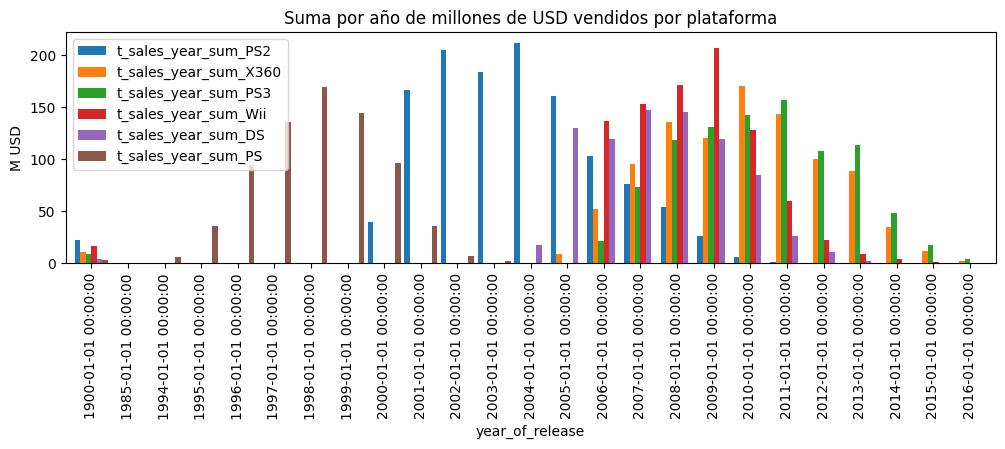

In [27]:
#Se muestra la grafica de barras
df_top_selling_platforms_sum_merge_sorted.plot(x='year_of_release',
                                               kind='bar',
                                               figsize=(12, 3),
                                               title='Suma por año de millones de USD vendidos por plataforma',
                                               ylabel='M USD',
                                               width=0.9)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para que el eje X muestre solo el año (y no la fecha completa con hora), puedes convertir explícitamente la columna *year_of_release* a tipo `str` o a un entero, o bien formatearlo adecuadamente si prefieres mantenerlo como `datetime`.

</div>

---
**Observaciones**

* Busca las plataformas que solían ser populares pero que ahora no tienen ventas.
 * Plataforma que solia ser popular: PS,   entre los años 1994 a 2003, duracion: 10 años
 * Plataforma que solia ser popular: PS2,  entre los años 2000 a 2011, duracion: 12 años
 * Plataforma que solia ser popular: DS,   entre los años 2004 a 2013, duracion: 10 años
 * Plataforma que solia ser popular: X360, entre los años 2005 a 2016, duracion: 12 años
 * Plataforma que solia ser popular: Wii,  entre los años 2006 a 2016, duracion: 11 años
 * Plataforma que solia ser popular: PS3,  entre los años 2006 a 2016, duracion: 11 años

* ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
 * Entre 11 y 12 años
---

### Modelo para 2017

* Determina para qué período debes tomar datos.
* Para hacerlo mira tus respuestas a las preguntas anteriores.
* Los datos deberían permitirte construir un modelo para 2017.
* Trabaja solo con los datos que consideras relevantes.
* Ignora los datos de años anteriores.

#### Modelo para 2017 - 01

In [28]:
# Se toma informacion de numero de liberaciones y ventas totales de años 2015 y 2016
df_data_model_2017 = df_releases_total_sales_by_year_merge[
                     df_releases_total_sales_by_year_merge[
                     'year_of_release'] >= '2015-01-01'].copy()
# Se reinicia el indice
df_data_model_2017.reset_index(drop=True, inplace=True)
display( df_data_model_2017 )

,year_of_release,releases (#),total_sales (M USD)
0,2015-01-01,606,267.98
1,2016-01-01,502,129.94


In [29]:
# En base a la ecuancion de la recta, se calcula el numero de liberaciones para el año 2017
x0 = df_data_model_2017.iloc[0, 0].year
y0 = df_data_model_2017.iloc[0, 1]
x1 = df_data_model_2017.iloc[1, 0].year
y1 = df_data_model_2017.iloc[1, 1]
x2 = 2017
y02 = ((y1-y0)/(x1-x0))*(x2-x1)+y1

# En base a la ecuancion de la recta, se calculan las ventas totales para el año 2017
x0 = df_data_model_2017.iloc[0, 0].year
y0 = df_data_model_2017.iloc[0, 2]
x1 = df_data_model_2017.iloc[1, 0].year
y1 = df_data_model_2017.iloc[1, 2]
x2 = 2017

y12 = ((y1-y0)/(x1-x0))*(x2-x1)+y1

# Add a new row using loc[]
df_data_model_2017.loc[len(df_data_model_2017)] = [2017, y02, y12]

df_data_model_2017.iloc[2, 0] = pd.to_datetime(df_data_model_2017.iloc[2, 0], format='%Y')

display( df_data_model_2017 )

,year_of_release,releases (#),total_sales (M USD)
0,2015-01-01 00:00:00,606.0,267.98
1,2016-01-01 00:00:00,502.0,129.94
2,2017-01-01 00:00:00,398.0,-8.10


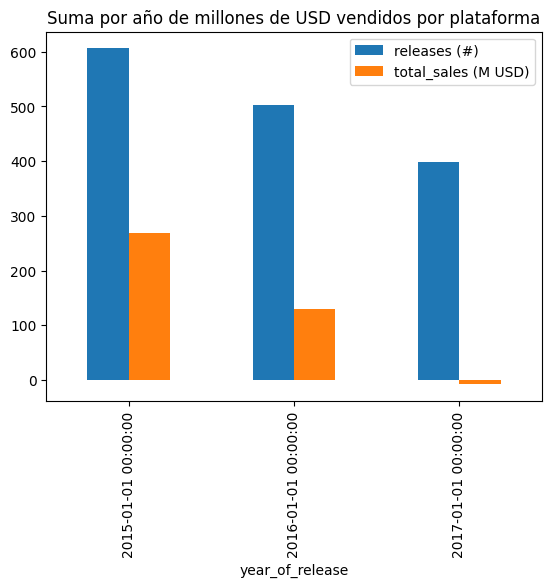

In [30]:
#Se muestra la grafica de barras
df_data_model_2017.plot(x='year_of_release',
                        kind='bar',
                        title='Suma por año de millones de USD vendidos por plataforma')
plt.show()

---
**Observaciones**

 * Tomando como referencia los datos de los dos ultimos años, la tendecia es a una perdida
---

#### Modelo para 2017 - 02

In [31]:
# Se crea dataframe con informacion de ventas totales del año 2012 al 2016
df_frac_releases = df_g_c[df_g_c['year_of_release'] >= '2012-01-01'].copy()

# Ventas totales por plataforma en orden descendete de 2012 a 2016
s_total_sales_by_platform_frac = df_frac_releases.groupby('platform').sum()['total_sales']
s_total_sales_by_platform_frac_sorted = s_total_sales_by_platform_frac.sort_values(ascending=False)

display( s_total_sales_by_platform_frac_sorted )

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

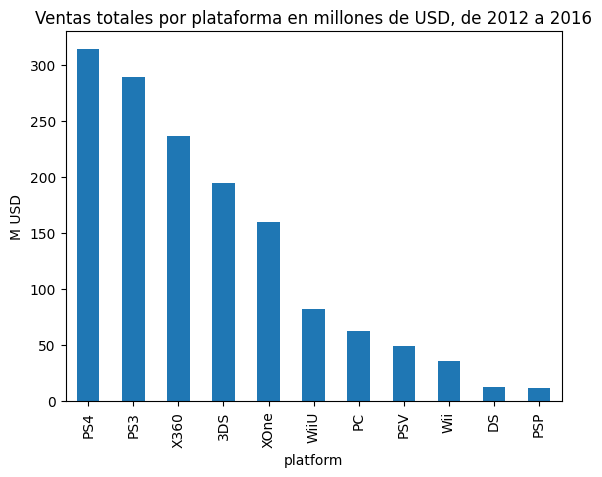

In [32]:
# Grafico de barras de ventas totales por plataforma en orden descendete
s_total_sales_by_platform_frac_sorted.plot(x='platform',
                                           kind='bar',
                                           title='Ventas totales por plataforma en millones de USD, de 2012 a 2016',
                                           ylabel='M USD',)
plt.show()

#### Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

In [33]:
# Seleccion de las plataformas con mayores ventas totales
l_top_selling_platforms_frac = s_total_sales_by_platform_frac_sorted[0:5].index.tolist()
display( l_top_selling_platforms_frac )

['PS4', 'PS3', 'X360', '3DS', 'XOne']

In [34]:
# Filtrado de dataframe en base a las plataformas con mayores ventas
df_top_selling_platforms_frac = df_frac_releases[df_frac_releases['platform'].isin(l_top_selling_platforms_frac)][['platform', 'year_of_release','total_sales']].copy()
display( df_top_selling_platforms_frac.head() )

,platform,year_of_release,total_sales
16,PS3,2013-01-01,21.05
23,X360,2013-01-01,16.27
31,PS4,2015-01-01,14.63
33,3DS,2013-01-01,14.60
34,PS3,2012-01-01,13.79


In [35]:
# Se calcula la suma total por plataforma y por año
df_top_selling_platforms_frac_sum = df_top_selling_platforms_frac.groupby(['platform', 'year_of_release']).sum()
df_top_selling_platforms_frac_sum = df_top_selling_platforms_frac_sum.rename(columns={'total_sales': 't_sales_year_sum'})

# Se muestra parte del dataframe con el fin de corroborar los cambios
display( df_top_selling_platforms_frac_sum.head() )

t_sales_year_sum
platform year_of_release                  
3DS      2012-01-01                  51.36
         2013-01-01                  56.57
         2014-01-01                  43.76
         2015-01-01                  27.78
         2016-01-01                  15.14

In [36]:
# Se resetea el indice para remover el multiindice
df_top_selling_platforms_frac_sum_reset = df_top_selling_platforms_frac_sum.reset_index()

# Se muestra parte del dataframe con el fin de corroborar los cambios
display( df_top_selling_platforms_frac_sum_reset.head() )

,platform,year_of_release,t_sales_year_sum
0,3DS,2012-01-01,51.36
1,3DS,2013-01-01,56.57
2,3DS,2014-01-01,43.76
3,3DS,2015-01-01,27.78
4,3DS,2016-01-01,15.14


In [37]:
# Se divide el dataframe # Se divide el dataframe df_duration_avg_reset en 6 dataframes, uno por cada plataforma
df_top_selling_platforms_frac_sum_reset_PS4  = df_top_selling_platforms_frac_sum_reset[df_top_selling_platforms_frac_sum_reset['platform'] == 'PS4'][['year_of_release', 't_sales_year_sum']].copy()
df_top_selling_platforms_frac_sum_reset_PS3  = df_top_selling_platforms_frac_sum_reset[df_top_selling_platforms_frac_sum_reset['platform'] == 'PS3'][['year_of_release', 't_sales_year_sum']].copy()
df_top_selling_platforms_frac_sum_reset_X360 = df_top_selling_platforms_frac_sum_reset[df_top_selling_platforms_frac_sum_reset['platform'] == 'X360'][['year_of_release', 't_sales_year_sum']].copy()
df_top_selling_platforms_frac_sum_reset_3DS  = df_top_selling_platforms_frac_sum_reset[df_top_selling_platforms_frac_sum_reset['platform'] == '3DS'][['year_of_release', 't_sales_year_sum']].copy()
df_top_selling_platforms_frac_sum_reset_XOne = df_top_selling_platforms_frac_sum_reset[df_top_selling_platforms_frac_sum_reset['platform'] == 'XOne'][['year_of_release', 't_sales_year_sum']].copy()

# Se unifican los 6 dataframes en un solo dataframes
df_top_selling_platforms_frac_sum_merge = df_top_selling_platforms_frac_sum_reset_PS4.merge(
                                          df_top_selling_platforms_frac_sum_reset_PS3, on='year_of_release', how='outer')

df_top_selling_platforms_frac_sum_merge = df_top_selling_platforms_frac_sum_merge.rename(
                                          columns={'t_sales_year_sum_x': 't_sales_year_sum_PS4',
                                                   't_sales_year_sum_y': 't_sales_year_sum_PS3'})

df_top_selling_platforms_frac_sum_merge = df_top_selling_platforms_frac_sum_merge.merge(
                                          df_top_selling_platforms_frac_sum_reset_X360, on='year_of_release', how='outer').merge(
                                          df_top_selling_platforms_frac_sum_reset_3DS, on='year_of_release', how='outer')

df_top_selling_platforms_frac_sum_merge = df_top_selling_platforms_frac_sum_merge.rename(
                                          columns={'t_sales_year_sum_x': 't_sales_year_sum_X360',
                                                   't_sales_year_sum_y': 't_sales_year_sum_3DS'})

df_top_selling_platforms_frac_sum_merge = df_top_selling_platforms_frac_sum_merge.merge(
                                          df_top_selling_platforms_frac_sum_reset_XOne, on='year_of_release', how='outer')

df_top_selling_platforms_frac_sum_merge = df_top_selling_platforms_frac_sum_merge.rename(
                                          columns={'t_sales_year_sum': 't_sales_year_sum_XOne'})

df_top_selling_platforms_frac_sum_merge.fillna(0, inplace=True)

df_top_selling_platforms_frac_sum_merge_sorted = df_top_selling_platforms_frac_sum_merge.sort_values(by='year_of_release')

display( df_top_selling_platforms_frac_sum_merge_sorted )


,year_of_release,t_sales_year_sum_PS4,t_sales_year_sum_PS3,t_sales_year_sum_X360,t_sales_year_sum_3DS,t_sales_year_sum_XOne
4,2012-01-01,0.00,107.36,99.74,51.36,0.00
0,2013-01-01,25.99,113.25,88.58,56.57,18.96
1,2014-01-01,100.00,47.76,34.74,43.76,54.07
2,2015-01-01,118.90,16.82,11.96,27.78,60.14
3,2016-01-01,69.25,3.60,1.52,15.14,26.15


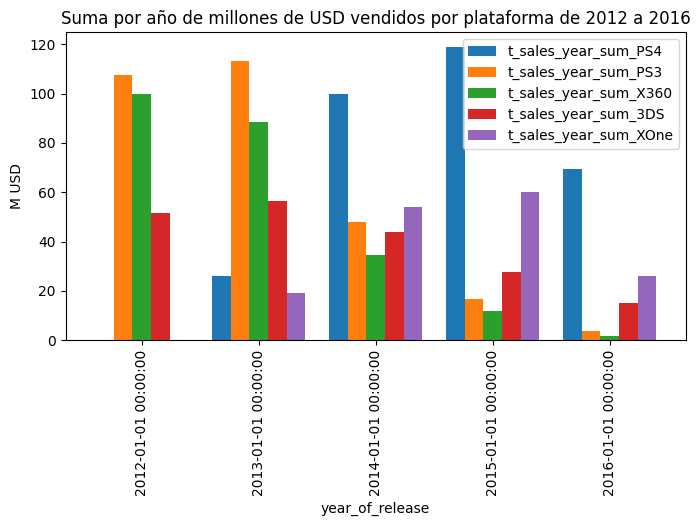

In [38]:
#Se muestra la grafica de barras
df_top_selling_platforms_frac_sum_merge_sorted.plot(x='year_of_release',
                                                    kind='bar',
                                                    figsize=(8, 4),
                                                    title='Suma por año de millones de USD vendidos por plataforma de 2012 a 2016',
                                                    ylabel='M USD',
                                                    width=0.8)
plt.show()

---
**Observaciones**

* ¿Qué plataformas son líderes en ventas?
 * Las plataformas que son lideres en ventas de lo años 2012 a 2016 son (M-USD): 
   * PS4  con 314.14
   * PS3  con 288.79
   * X360 con 236.54
   * 3DS  con 194.61
   * XOne con 159.32
   
* ¿Cuáles crecen y cuáles se reducen?
           
 * PS4  -> crece, se reduce
 * PS3  ->        se reduce
 * X360 ->        se reduce
 * 3DS  ->        se reduce
 * XOne -> crece, se reduce  
 
* Elige varias plataformas potencialmente rentables.
 * No escogeria ninguna, ya que todas al final, se estan reduciendo.
 * Escogeria al fabricante de las plataformas mas exitosas, ya que este seria el que tiene el potencial de fabricar nuevas plataformas que tambien sean un exito. En este caso: Sony Computer Entertainment, que es el dueño de las dos plataformas más exitosas en este listado.
---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo identificando las tendencias de las principales plataformas de videojuegos, evidenciando tanto sus fases de crecimiento como de declive. 

</div>

#### Modelo para 2017 - 03

Para poder contar con una vision mas general de la dinamica de las plataformas, descidi hacer el mismo proceso de analisis para las plataformas con menores ganancias. Con el fin de ver si pudiesen existir compañias que apenas estuviesen comenzando, lo cual justificaria su baja cantidad de ventas.

#### Elige las plataformas con las menores ventas totales y construye una distribución basada en los datos de cada año.

In [39]:
# Seleccion de las plataformas con menores ventas
l_bottom_selling_platforms_frac = s_total_sales_by_platform_frac_sorted[s_total_sales_by_platform_frac_sorted < 90].index.tolist()
display( l_bottom_selling_platforms_frac )

['WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

In [40]:
# Filtrado de dataframe en base a las plataformas con menores ventas
df_bottom_selling_platforms_frac = df_frac_releases[df_frac_releases['platform'].isin(l_bottom_selling_platforms_frac)][['platform', 'year_of_release','total_sales']].copy()
display( df_bottom_selling_platforms_frac.head() )

,platform,year_of_release,total_sales
83,DS,2012-01-01,8.06
110,WiiU,2014-01-01,7.09
116,Wii,2012-01-01,6.76
185,WiiU,2012-01-01,5.23
192,PC,2012-01-01,5.14


In [41]:
# Se calcula la suma total por plataforma y por año
df_bottom_selling_platforms_frac_sum = df_bottom_selling_platforms_frac.groupby(['platform', 'year_of_release']).sum()
df_bottom_selling_platforms_frac_sum = df_bottom_selling_platforms_frac_sum.rename(columns={'total_sales': 't_sales_year_sum'})

# Se muestra parte del dataframe con el fin de corroborar los cambios
display( df_bottom_selling_platforms_frac_sum.head() )

t_sales_year_sum
platform year_of_release                  
DS       2012-01-01                  11.01
         2013-01-01                   1.54
PC       2012-01-01                  23.22
         2013-01-01                  12.38
         2014-01-01                  13.28

In [42]:
# Se resetea el indice para remover el multiindice
df_bottom_selling_platforms_frac_sum_reset = df_bottom_selling_platforms_frac_sum.reset_index()

# Se muestra parte del dataframe con el fin de corroborar los cambios
display( df_bottom_selling_platforms_frac_sum_reset.head() )

,platform,year_of_release,t_sales_year_sum
0,DS,2012-01-01,11.01
1,DS,2013-01-01,1.54
2,PC,2012-01-01,23.22
3,PC,2013-01-01,12.38
4,PC,2014-01-01,13.28


In [43]:
display( l_bottom_selling_platforms_frac )

['WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

In [44]:
# Se divide el dataframe # Se divide el dataframe df_duration_avg_reset en 6 dataframes, uno por cada plataforma
df_bottom_selling_platforms_frac_sum_reset_WiiU  = df_bottom_selling_platforms_frac_sum_reset[df_bottom_selling_platforms_frac_sum_reset['platform'] == 'WiiU'][['year_of_release', 't_sales_year_sum']].copy()
df_bottom_selling_platforms_frac_sum_reset_PC  = df_bottom_selling_platforms_frac_sum_reset[df_bottom_selling_platforms_frac_sum_reset['platform'] == 'PC'][['year_of_release', 't_sales_year_sum']].copy()
df_bottom_selling_platforms_frac_sum_reset_PSV = df_bottom_selling_platforms_frac_sum_reset[df_bottom_selling_platforms_frac_sum_reset['platform'] == 'PSV'][['year_of_release', 't_sales_year_sum']].copy()
df_bottom_selling_platforms_frac_sum_reset_Wii  = df_bottom_selling_platforms_frac_sum_reset[df_bottom_selling_platforms_frac_sum_reset['platform'] == 'Wii'][['year_of_release', 't_sales_year_sum']].copy()
df_bottom_selling_platforms_frac_sum_reset_DS = df_bottom_selling_platforms_frac_sum_reset[df_bottom_selling_platforms_frac_sum_reset['platform'] == 'DS'][['year_of_release', 't_sales_year_sum']].copy()
df_bottom_selling_platforms_frac_sum_reset_PSP = df_bottom_selling_platforms_frac_sum_reset[df_bottom_selling_platforms_frac_sum_reset['platform'] == 'PSP'][['year_of_release', 't_sales_year_sum']].copy()

# Se unifican los 6 dataframes en un solo dataframes
df_bottom_selling_platforms_frac_sum_merge = df_bottom_selling_platforms_frac_sum_reset_WiiU.merge(
                                             df_bottom_selling_platforms_frac_sum_reset_PC, on='year_of_release', how='outer')

df_bottom_selling_platforms_frac_sum_merge = df_bottom_selling_platforms_frac_sum_merge.rename(
                                             columns={'t_sales_year_sum_x': 't_sales_year_sum_WiiU',
                                                      't_sales_year_sum_y': 't_sales_year_sum_PC'})

df_bottom_selling_platforms_frac_sum_merge = df_bottom_selling_platforms_frac_sum_merge.merge(
                                             df_bottom_selling_platforms_frac_sum_reset_PSV, on='year_of_release', how='outer').merge(
                                             df_bottom_selling_platforms_frac_sum_reset_Wii, on='year_of_release', how='outer')

df_bottom_selling_platforms_frac_sum_merge = df_bottom_selling_platforms_frac_sum_merge.rename(
                                             columns={'t_sales_year_sum_x': 't_sales_year_sum_PSV',
                                                      't_sales_year_sum_y': 't_sales_year_sum_Wii'})

df_bottom_selling_platforms_frac_sum_merge = df_bottom_selling_platforms_frac_sum_merge.merge(
                                             df_bottom_selling_platforms_frac_sum_reset_DS, on='year_of_release', how='outer').merge(
                                             df_bottom_selling_platforms_frac_sum_reset_PSP, on='year_of_release', how='outer')

df_bottom_selling_platforms_frac_sum_merge = df_bottom_selling_platforms_frac_sum_merge.rename(
                                          columns={'t_sales_year_sum_x': 't_sales_year_sum_DS',
                                                    't_sales_year_sum_y': 't_sales_year_sum_PSP'})

df_bottom_selling_platforms_frac_sum_merge.fillna(0, inplace=True)

df_bottom_selling_platforms_frac_sum_merge_sorted = df_bottom_selling_platforms_frac_sum_merge.sort_values(by='year_of_release')

display( df_bottom_selling_platforms_frac_sum_merge_sorted )


,year_of_release,t_sales_year_sum_WiiU,t_sales_year_sum_PC,t_sales_year_sum_PSV,t_sales_year_sum_Wii,t_sales_year_sum_DS,t_sales_year_sum_PSP
0,2012-01-01,17.56,23.22,16.19,21.71,11.01,7.69
1,2013-01-01,21.65,12.38,10.59,8.59,1.54,3.14
2,2014-01-01,22.03,13.28,11.90,3.75,0.00,0.24
3,2015-01-01,16.35,8.52,6.25,1.14,0.00,0.12
4,2016-01-01,4.60,5.25,4.25,0.18,0.00,0.00


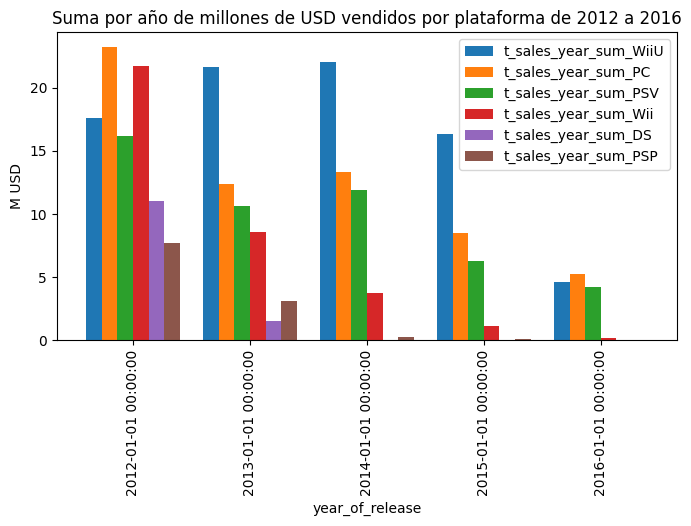

In [45]:
#Se muestra la grafica de barras
df_bottom_selling_platforms_frac_sum_merge_sorted.plot(x='year_of_release',
                                                    kind='bar',
                                                    figsize=(8, 4),
                                                    title='Suma por año de millones de USD vendidos por plataforma de 2012 a 2016',
                                                    ylabel='M USD',
                                                    width=0.8)
plt.show()

---
**Observaciones**

* ¿Qué plataformas son las que estan hasta abajo en ventas?
 * Plataformas hasta abajo en ventas de los años 2012 a 2016 son (M-USD): 
   * WiiU con  82.19
   * PC   con  62.65
   * PSV  con  49.18
   * Wii  con  35.37
   * DS   con  12.55
   * PSP  con  11.19
   
* ¿Cuáles crecen y cuáles se reducen?

 * WiiU -> crece, se reduce
 * PC   ->        se reduce        
 * PSV  ->        se reduce
 * Wii  ->        se reduce
 * DS   ->        se reduce
 * PSP  ->        se reduce
 
* Elige varias plataformas potencialmente rentables.
 * Pense que tal vez alguna de estas plataformas podria comenzar a crecer, pero no se ve ninguna intresante. Por lo tanto, no escogeria ninguna, ya que todas al final, se estan reduciendo
---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Raul has logrado identificar el grupo de plataformas con menores ventas y logras reconocer que, a pesar de algún crecimiento inicial en ciertos casos, todas tienden a una caída en su desempeño comercial.

</div>

###  Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma

* Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

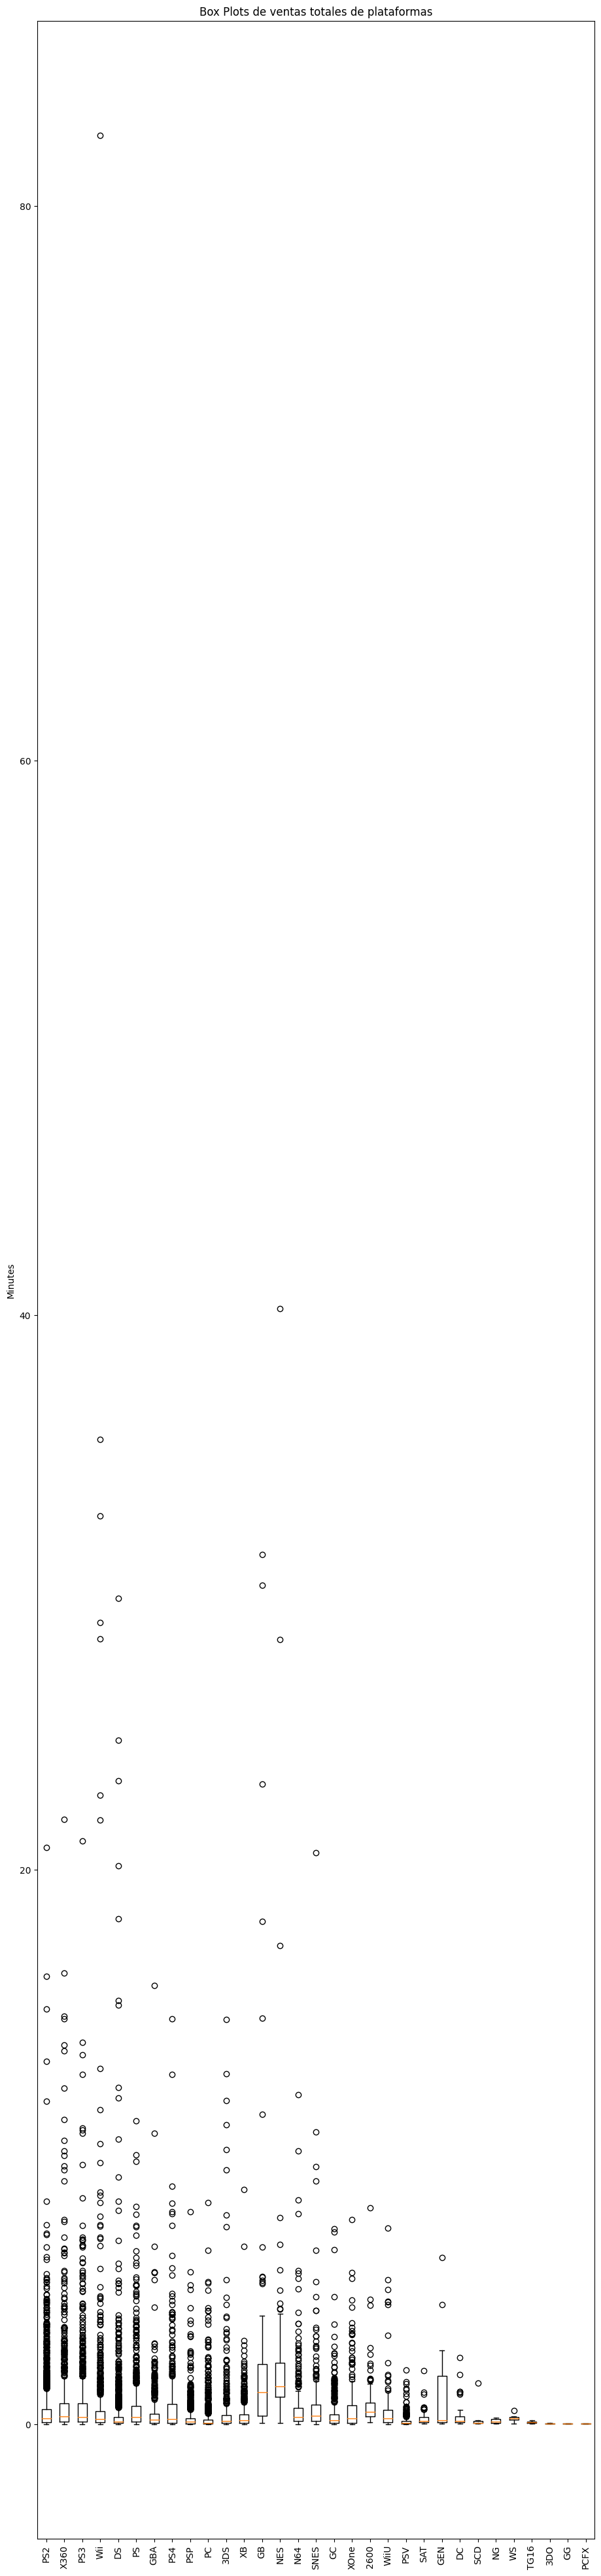

In [46]:
# Se toman los nombres de las plataformas

s_total_sales_by_platform_sorted = s_total_sales_by_platform.sort_values(ascending=False)

l_platforms = s_total_sales_by_platform_sorted.index.tolist()

#Se agregan la informacion de ventas totales para cada plataforma
l_platforms_data = []
for p in l_platforms:
    l_platforms_data.append(df_g_c[df_g_c['platform'] == p]['total_sales'])

fig, ax = plt.subplots(figsize=(11, 50))

# Create box plots
ax.boxplot(l_platforms_data, labels=l_platforms)

# Set title and labels
ax.set_title('Box Plots de ventas totales de plataformas')
ax.set_ylabel('Minutes')

plt.xticks(rotation=90)

# Show plot
plt.show()

---
**Observaciones**

* Debido a que el diagrama de caja no se puede observar adecuadamente por algunos valores muy extremos, se decidio tomar la informacion resumida por el metodo describe() y reunir la informacion en un dataframe
---

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como sugerencia, cuando tengas gráficas *box-plot* con cajas muy "estrechas" debido a la presencia de numerosos datos atípicos, considera incluir una versión adicional usando escala logarítmica. Esto facilitará la comparación y el análisis de los datos.

</div>

In [47]:
#l_platforms_descriptionl_platforms

df_platforms_description = pd.DataFrame([])

for p in l_platforms:
    df_platforms_description=df_platforms_description.append(df_g_c[df_g_c['platform'] == p]['total_sales'].describe())

df_platforms_description.fillna(0, inplace=True)
    
df_platforms_description.index = l_platforms

display( df_platforms_description )

,25%,50%,75%,count,max,mean,min,std
PS2,0.0800,0.230,0.5600,2161.0,20.81,0.581106,0.00,1.137927
X360,0.1100,0.280,0.7575,1262.0,21.82,0.769746,0.01,1.615674
PS3,0.1100,0.270,0.7500,1331.0,21.05,0.705973,0.00,1.391749
Wii,0.0800,0.190,0.4825,1320.0,82.54,0.687508,0.01,3.126609
DS,0.0500,0.110,0.2700,2151.0,29.80,0.374765,0.01,1.426451
PS,0.1100,0.260,0.6600,1197.0,10.95,0.610576,0.01,1.054502
GBA,0.0525,0.160,0.3900,822.0,15.84,0.386679,0.01,0.896897
PS4,0.0600,0.200,0.7300,392.0,14.63,0.801378,0.01,1.609456
PSP,0.0300,0.090,0.2300,1209.0,7.68,0.243218,0.01,0.520210
PC,0.0200,0.050,0.1700,974.0,8.01,0.266448,0.01,0.675577


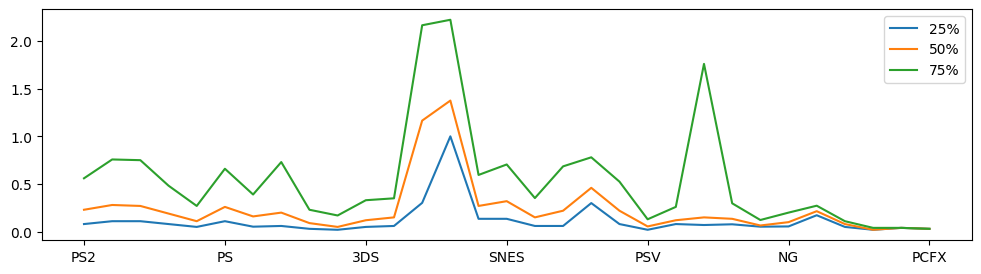

In [48]:
# Grafica de los percentiles de ventas totales entre plataformas
df_platforms_description.plot(figsize=(12, 3), y=['25%', '50%', '75%'])
plt.show()

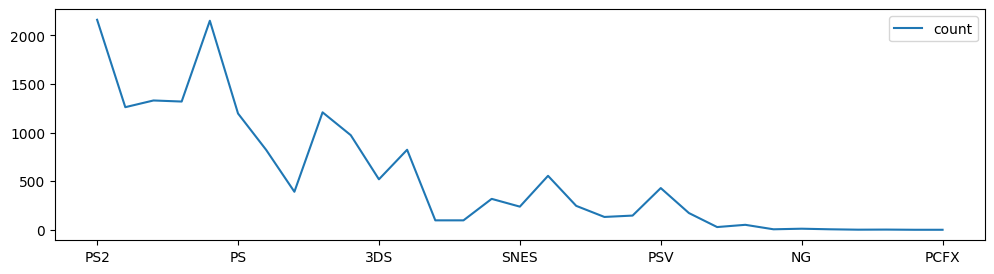

In [49]:
# Grafica del conteo ventas totales entre plataformas
df_platforms_description.plot(figsize=(12, 3), y='count')
plt.show()

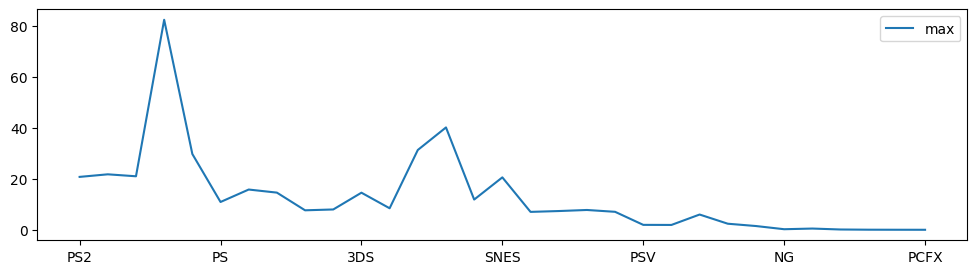

In [50]:
# Grafica de los maximos de ventas totales entre plataformas
df_platforms_description.plot(figsize=(12, 3), y='max')
plt.show()

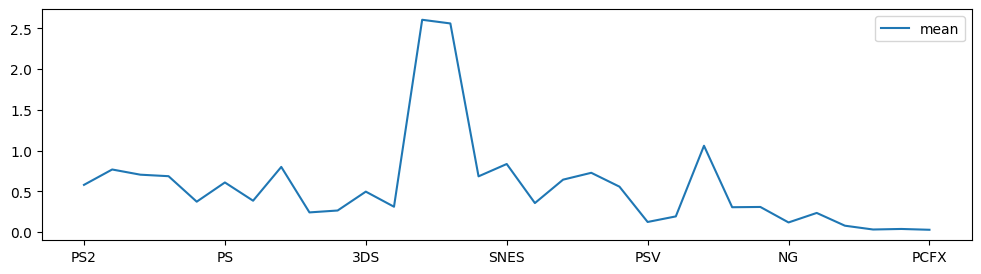

In [51]:
# Grafica de los promedios de ventas totales entre plataformas
df_platforms_description.plot(figsize=(12, 3), y='mean')
plt.show()

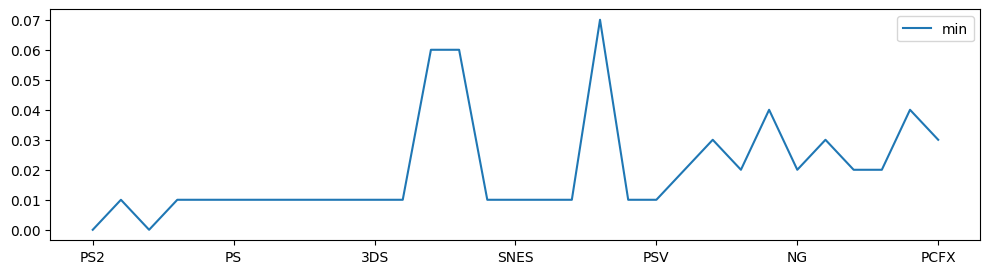

In [52]:
# Grafica de los minimos de ventas totales entre plataformas
df_platforms_description.plot(figsize=(12, 3), y='min')
plt.show()

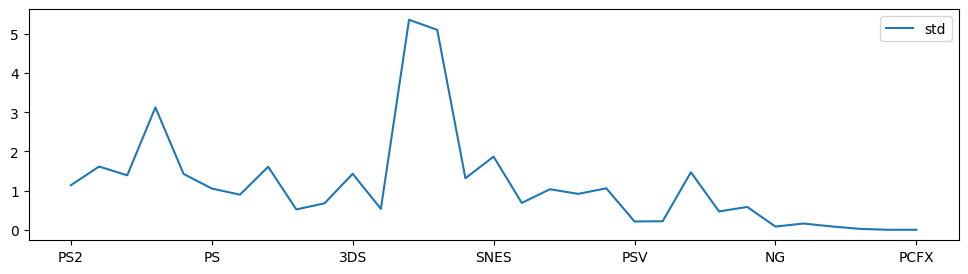

In [53]:
# Grafica de la desviacion estandar de ventas totales entre plataformas
df_platforms_description.plot(figsize=(12, 3), y='std')
plt.show()

---
**Observaciones**

* ¿Son significativas las diferencias en las ventas?
 * Si son significativas las diferencias, ya que existe una gran diferencia entre la cantidad de ventas entre unas y otras plataformas.
* ¿Qué sucede con las ventas promedio en varias plataformas?
 * Los promedios como tales, no son muy altos, y en general se encuentran agrupados, con algunas excepciones
* Describe tus hallazgos.
 * Las ventas totales de las plataformas cuentan con muchos valores que se encuentran mas alla de los bigotes de las cajas
 * Tambien se puede observar que aunque existen algunas plataformas con una gran cantidad de valores extremos, el promedio es bastante bajo
---

### Influencia de reseñas en  ventas de una plataforma popular

* Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).
* Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.
* Saca conclusiones.

#### Influencia de reseñas de usuarios en ventas de una plataforma popular

/tmp/ipykernel_50/4049951905.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_platform_user_s_PS2_f = df_platform_user_s_PS2[df_platform_user_s['user_score'] != -1].copy()


Coeficiente de correlacion:  0.17286551112058213


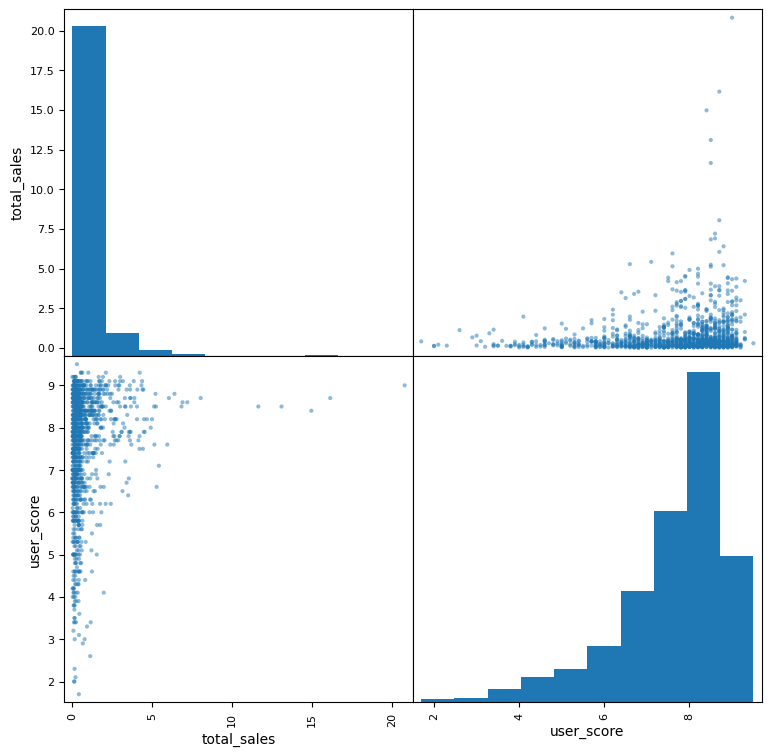

In [54]:
# Informacion de reseñas de usuarios
df_platform_user_s = df_g_c[['platform', 'total_sales', 'user_score']].copy()
df_platform_user_s_PS2 = df_platform_user_s[df_platform_user_s['platform'] == 'PS2'].copy()
df_platform_user_s_PS2_f = df_platform_user_s_PS2[df_platform_user_s['user_score'] != -1].copy()

print("Coeficiente de correlacion: ", df_platform_user_s_PS2_f['total_sales'].corr(df_platform_user_s_PS2_f['user_score']))

pd.plotting.scatter_matrix(df_platform_user_s_PS2_f, figsize=(9, 9))
plt.show()

---
**Observaciones**

 * Se observa una correlacion positiva debil entre las ventas totales y las reseñas de usuarios
---

#### Influencia de reseñas de criticos en ventas de una plataforma popular

/tmp/ipykernel_50/1131539460.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_platform_critic_s_PS2_f = df_platform_critic_s_PS2[df_platform_critic_s['critic_score'] != -1].copy()


Coeficiente de correlacion:  0.3954345494545487


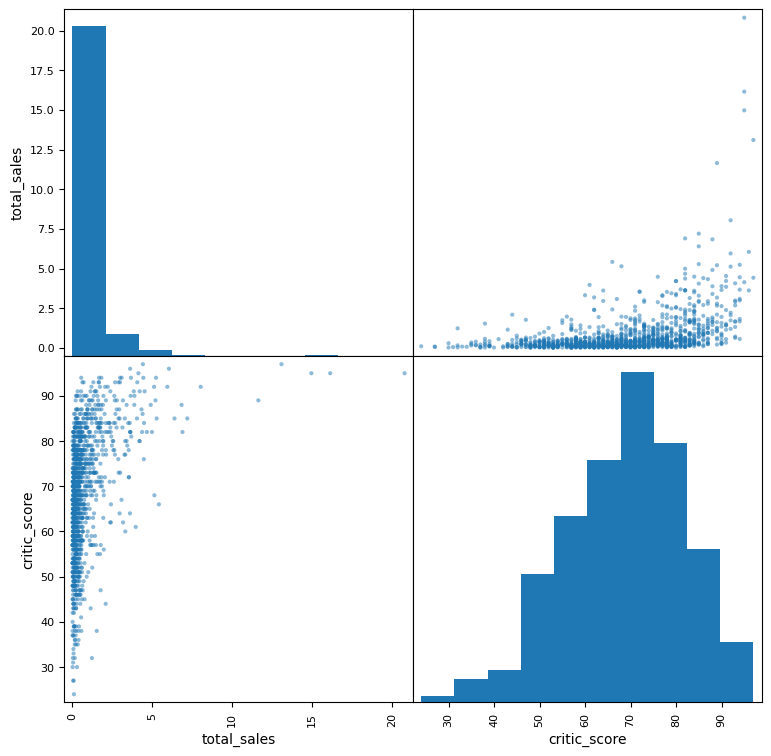

In [55]:
df_platform_critic_s = df_g_c[['platform', 'total_sales', 'critic_score']].copy()
df_platform_critic_s_PS2 = df_platform_critic_s[df_platform_critic_s['platform'] == 'PS2'].copy()
df_platform_critic_s_PS2_f = df_platform_critic_s_PS2[df_platform_critic_s['critic_score'] != -1].copy()

print("Coeficiente de correlacion: ", df_platform_critic_s_PS2_f['total_sales'].corr(df_platform_critic_s_PS2_f['critic_score']))

pd.plotting.scatter_matrix(df_platform_critic_s_PS2_f, figsize=(9, 9))
plt.show()

---
**Observaciones**

 * Se observa una correlacion positiva mediana entre las ventas totales y las reseñas de criticos
---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Genial Raul, Con esta información se evidencia que la puntuación de los críticos está un poco más relacionada con las ventas que la de los usuarios, aunque la correlación es débil. En User_Score no hay una tendencia clara, pero en Critic_Score, los juegos mejor calificados tienden a vender más. Esto sugiere que las críticas especializadas pueden tener mayor impacto en las ventas.

</div>

### Comparacion de ventas de mismos juegos en diferentes plataformas

* Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [56]:
# Se ordenan los juegos por numero de plataforma
df_by_name = df_g_c[['name', 'platform']].copy()
df_by_name_count = df_by_name.groupby(['name']).count()

df_by_name_count_sorted = df_by_name_count.sort_values(by='platform', ascending=False)

display( df_by_name_count_sorted.head(6) )

,platform
name,
Need for Speed: Most Wanted,12
Madden NFL 07,9
FIFA 14,9
LEGO Marvel Super Heroes,9
Ratatouille,9
Madden NFL 08,8


In [57]:
# Seleccion los juegos con un numero de plataformas iguales o mayores a nueve
l_top_game_count_platforms = df_by_name_count_sorted[df_by_name_count_sorted['platform'] >= 9].index.tolist()
display( l_top_game_count_platforms )

['Need for Speed: Most Wanted',
 'Madden NFL 07',
 'FIFA 14',
 'LEGO Marvel Super Heroes',
 'Ratatouille']

In [58]:
# Filtrado de dataframe en base a los juegos seleccionados
df_platforms_by_game_frac = df_g_c[df_g_c['name'].isin(l_top_game_count_platforms)][['platform', 'name', 'total_sales']].copy()
display( df_platforms_by_game_frac.head() )

,platform,name,total_sales
126,PS3,FIFA 14,6.46
241,PS2,Madden NFL 07,4.49
253,PS2,Need for Speed: Most Wanted,4.37
271,X360,FIFA 14,4.22
469,PS4,FIFA 14,3.01


In [59]:
# Agrupacion de ventas totales por juego y plataforma
df_by_name_by_platform_frac_sum = df_platforms_by_game_frac.groupby(['name','platform']).sum()
display( df_by_name_by_platform_frac_sum.head(60) )

total_sales
name                        platform             
FIFA 14                     3DS              0.23
                            PC               0.40
                            PS3              6.46
                            PS4              3.01
                            PSP              0.19
                            PSV              0.41
                            Wii              0.38
                            X360             4.22
                            XOne             1.16
LEGO Marvel Super Heroes    3DS              0.89
                            DS               0.38
                            PC               0.17
                            PS3              1.83
                            PS4              1.62
                            PSV              0.51
                            WiiU             0.74
                            X360             2.22
                            XOne             1.05
Madden NFL 07               DS               0.22
                            GBA              0.03
                            GC               0.63
                            PS2              4.49
                            PS3              0.52
                            PSP              0.84
                            Wii              0.50
                            X360             1.80
                            XB               1.03
Need for Speed: Most Wanted DS               0.27
                            GBA              0.26
                            GC               0.56
                            PC               0.37
                            PS2              4.37
                            PS3              2.81
                            PSV              1.01
                            WiiU             0.27
                            X360             2.81
                            XB               1.04
Ratatouille                 DS               1.25
                            GBA              0.19
                            GC               0.14
                            PC               0.02
                            PS2              0.84
                            PS3              0.51
                            PSP              0.65
                            Wii              0.50
                            X360             0.27

In [60]:
# Se resetea el indice para remover el multiindice
df_by_name_by_platform_frac_sum_reset = df_by_name_by_platform_frac_sum.reset_index()

# Se muestra parte del dataframe con el fin de corroborar los cambios
display( df_by_name_by_platform_frac_sum_reset.head() )

,name,platform,total_sales
0,FIFA 14,3DS,0.23
1,FIFA 14,PC,0.40
2,FIFA 14,PS3,6.46
3,FIFA 14,PS4,3.01
4,FIFA 14,PSP,0.19


In [61]:
# Se divide el dataframe # Se divide el dataframe df_duration_avg_reset en 6 dataframes, uno por cada plataforma
df_by_name_by_platform_frac_sum_reset_0 = df_by_name_by_platform_frac_sum_reset[df_by_name_by_platform_frac_sum_reset['name'] == 'FIFA 14'][['platform', 'total_sales']].copy()
df_by_name_by_platform_frac_sum_reset_1 = df_by_name_by_platform_frac_sum_reset[df_by_name_by_platform_frac_sum_reset['name'] == 'LEGO Marvel Super Heroes'][['platform', 'total_sales']].copy()
df_by_name_by_platform_frac_sum_reset_2 = df_by_name_by_platform_frac_sum_reset[df_by_name_by_platform_frac_sum_reset['name'] == 'Madden NFL 07'][['platform', 'total_sales']].copy()
df_by_name_by_platform_frac_sum_reset_3 = df_by_name_by_platform_frac_sum_reset[df_by_name_by_platform_frac_sum_reset['name'] == 'Ratatouille'][['platform', 'total_sales']].copy()
df_by_name_by_platform_frac_sum_reset_4 = df_by_name_by_platform_frac_sum_reset[df_by_name_by_platform_frac_sum_reset['name'] == 'Need for Speed: Most Wanted'][['platform', 'total_sales']].copy()

# Se unifican los 4 dataframes en un solo dataframes
df_by_name_by_platform_frac_sum_merge = df_by_name_by_platform_frac_sum_reset_0.merge(
                                        df_by_name_by_platform_frac_sum_reset_1, on='platform', how='outer')

df_by_name_by_platform_frac_sum_merge = df_by_name_by_platform_frac_sum_merge.rename(
                                        columns={'total_sales_x': 'total_sales_FIFA',
                                                 'total_sales_y': 'total_sales_LEGO'})

df_by_name_by_platform_frac_sum_merge = df_by_name_by_platform_frac_sum_merge.merge(
                                        df_by_name_by_platform_frac_sum_reset_2, on='platform', how='outer').merge(
                                        df_by_name_by_platform_frac_sum_reset_3, on='platform', how='outer')

df_by_name_by_platform_frac_sum_merge = df_by_name_by_platform_frac_sum_merge.rename(
                                        columns={'total_sales_x': 'total_sales_Madden',
                                                 'total_sales_y': 'total_sales_Ratatouille'})

df_by_name_by_platform_frac_sum_merge = df_by_name_by_platform_frac_sum_merge.merge(
                                        df_by_name_by_platform_frac_sum_reset_4, on='platform', how='outer')

df_by_name_by_platform_frac_sum_merge = df_by_name_by_platform_frac_sum_merge.rename(
                                        columns={'total_sales': 'total_sales_Need'})

df_by_name_by_platform_frac_sum_merge_clean = df_by_name_by_platform_frac_sum_merge.dropna(thresh=5).copy()

df_by_name_by_platform_frac_sum_merge_clean.fillna(0, inplace=True)

display( df_by_name_by_platform_frac_sum_merge_clean )

,platform,total_sales_FIFA,total_sales_LEGO,total_sales_Madden,total_sales_Ratatouille,total_sales_Need
1,PC,0.40,0.17,0.00,0.02,0.37
2,PS3,6.46,1.83,0.52,0.51,2.81
7,X360,4.22,2.22,1.80,0.27,2.81
9,DS,0.00,0.38,0.22,1.25,0.27


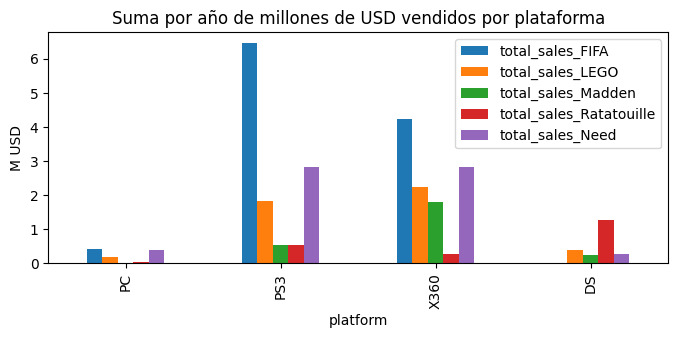

In [62]:
#Se muestra la grafica de barras
df_by_name_by_platform_frac_sum_merge_clean.plot(x='platform',
                                                 kind='bar',
                                                 figsize=(8, 3),
                                                 title='Suma por año de millones de USD vendidos por plataforma',
                                                 ylabel='M USD')
plt.show()

---
**Observaciones**

 * La plataforma tiene una gran influencia en la cantidad de ventas del juego
---

### Distribución general de los juegos por género

* Echa un vistazo a la distribución general de los juegos por género.

In [63]:
df_by_genre = df_g_c[['genre', 'total_sales']].copy()
df_by_genre_sum = df_by_genre.groupby('genre').sum().copy()
df_by_genre_sum_sorted = df_by_genre_sum.sort_values(by='total_sales', ascending=False)
s_by_genre_sum_sorted = df_by_genre_sum_sorted.squeeze()
display( s_by_genre_sum_sorted )

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
unknown            2.42
Name: total_sales, dtype: float64

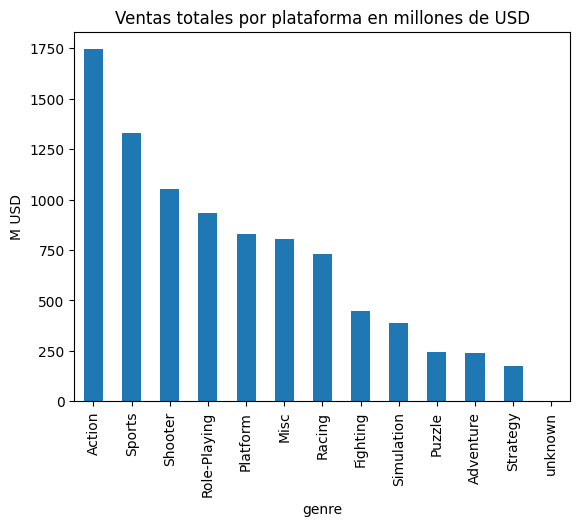

In [64]:
# Grafico de barras de ventas totales por plataforma en orden descendete
s_by_genre_sum_sorted.plot(x='genre',
                            kind='bar',
                            title='Ventas totales por plataforma en millones de USD',
                            ylabel='M USD',)
plt.show()

---
**Observaciones**

* ¿Qué se puede decir de los géneros más rentables?
 * Son los que mas liberan adrenalina
* ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
 * Hasta cierto punto si, ya que la cantidad de ventas de cada genero representa la composicion de la comunidad de jugadores
---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo! Se ve claramente que los juegos de acción y disparo lideran en ventas. Los géneros de rol y deportes también destacan, aunque en menor medida. En cambio, los de estrategia, aventura y puzzle muestran ventas más bajas, lo que indica una demanda más limitada.

</div>

### Conclusiones generales paso 3

---
* Juegos lanzados por año y ventas totales por año ¿Son significativos los datos de cada período?
 * Se puede observar que al principio la liberacion de nuevos juegos, es bastante modesta, aunque despues, se puede observar como se incrementa la produccion con el paso de los años, llegando a su maximo en 2008 y 2009 para luego ir descendiendo. La liberacion de juegos coincide proporcionalmente con las ventas totales por año.
---
* Las plataformas que solían ser populares pero que ahora no tienen ventas.
 * Plataforma que solia ser popular: PS, entre los años 1994 a 2003, duracion: 10 años
 * Plataforma que solia ser popular: PS2, entre los años 2000 a 2011, duracion: 12 años
 * Plataforma que solia ser popular: DS, entre los años 2004 a 2013, duracion: 10 años
 * Plataforma que solia ser popular: X360, entre los años 2005 a 2016, duracion: 12 años
 * Plataforma que solia ser popular: Wii, entre los años 2006 a 2016, duracion: 11 años
 * Plataforma que solia ser popular: PS3, entre los años 2006 a 2016, duracion: 11 años
* ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
 * Entre 11 y 12 años
---
* Modelo 2017 - 01
 * Tomando como referencia los datos de los dos ultimos años, la tendecia es a una perdida
---
* Modelo 2017 - 02
 * Las plataformas que son lideres en ventas de lo años 2012 a 2016 son (M-USD):
   * PS4 con 314.14
   * PS3 con 288.79
   * X360 con 236.54
   * 3DS con 194.61
   * XOne con 159.32
 * ¿Cuáles crecen y cuáles se reducen?
   * PS4 -> crece, se reduce
   * PS3 -> se reduce
   * X360 -> se reduce
   * 3DS -> se reduce
   * XOne -> crece, se reduce
 * Elige varias plataformas potencialmente rentables.
   * No escogeria ninguna, ya que todas al final, se estan reduciendo.
   * Escogeria al fabricante de las plataformas mas exitosas, ya que este seria el que tiene el potencial de fabricar nuevas plataformas que tambien sean un exito. En este caso: Sony Computer Entertainment, que es el dueño de las dos plataformas más exitosas en este listado.
---
* Modelo 2017 - 03
 * Plataformas hasta abajo en ventas de los años 2012 a 2016 son (M-USD):
   * WiiU con 82.19
   * PC con 62.65
   * PSV con 49.18
   * Wii con 35.37
   * DS con 12.55
   * PSP con 11.19
 * ¿Cuáles crecen y cuáles se reducen?
   * WiiU -> crece, se reduce
   * PC -> se reduce
   * PSV -> se reduce
   * Wii -> se reduce
   * DS -> se reduce
   * PSP -> se reduce
 * Elige varias plataformas potencialmente rentables.
   * Como suposicion, algunas de estas plataformas podria comenzar a crecer, pero no se ve ninguna intresante. Por lo tanto, no escogeria ninguna, ya que todas al final, se estan reduciendo
---
* Diagrama de caja
 * Debido a que el diagrama de caja no se puede observar adecuadamente por algunos valores muy extremos, se decidio tomar la informacion resumida por el metodo describe() y reunir la informacion en un dataframe
   * ¿Son significativas las diferencias en las ventas?
   * Si son significativas las diferencias, ya que existe una gran diferencia entre la cantidad de ventas entre unas y otras plataformas.
 * ¿Qué sucede con las ventas promedio en varias plataformas?
   * Los promedios como tales, no son muy altos, y en general se encuentran agrupados, con algunas excepciones
 * Describe tus hallazgos.
   * Las ventas totales de las plataformas cuentan con muchos valores que se encuentran mas alla de los bigotes de las cajas
   * Tambien se puede observar que aunque existen algunas plataformas con una gran cantidad de valores extremos, el promedio es bastante bajo
---
* Influencia de reseñas de usuarios en ventas de una plataforma popular
 * Se observa una correlacion positiva debil entre las ventas totales y las reseñas de usuarios
---
*  Influencia de reseñas de criticos en ventas de una plataforma popular
 * Se observa una correlacion positiva mediana entre las ventas totales y las reseñas de criticos
* Comparacion de ventas de mismos juegos en diferentes plataformas
 * La plataforma tiene una gran influencia en la cantidad de ventas del juego
---
* Distribución general de los juegos por género
 * ¿Qué se puede decir de los géneros más rentables?
   * Son los que mas liberan adrenalina
 * ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
   * Hasta cierto punto si, ya que la cantidad de ventas de cada genero representa la composicion de la comunidad de jugadores
---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Raul has logrado integrar distintas fuentes de información y enfoques para construir una visión amplia del comportamiento del mercado de videojuegos. Se nota un esfuerzo por vincular tendencias históricas de ventas, ciclos de vida de plataformas, y la influencia de factores como las reseñas o el género de los juegos, todo dentro de un marco temporal bien definido. 

</div>

## Paso 4: Crea un perfil de usuario para cada región

* Para cada región (NA, EU, JP) determina:
 * Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
 * Los cinco géneros principales. Explica la diferencia.
 * Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### Cinco plataformas principales NA, EU, JP

In [65]:
l_top_5_platforms_by_total_sales = s_total_sales_by_platform_sorted[0:5].index.tolist()

# Filtrado de dataframe en base a las plataformas con mayores ventas
df_top_5_platforms_by_na_eu_jp_sales = df_g_c[df_g_c['platform'].isin(l_top_5_platforms_by_total_sales)][['platform',
                                                                                                          'na_sales',
                                                                                                          'eu_sales',
                                                                                                          'jp_sales',
                                                                                                          'total_sales']].copy()
df_top_5_platforms_by_na_eu_jp_sales_group = df_top_5_platforms_by_na_eu_jp_sales.groupby('platform').sum()

# Se resetea el indice para remover el multiindice
df_top_5_platforms_by_na_eu_jp_sales_group_reset = df_top_5_platforms_by_na_eu_jp_sales_group.reset_index()

display( df_top_5_platforms_by_na_eu_jp_sales_group_reset )

,platform,na_sales,eu_sales,jp_sales,total_sales
0,DS,382.40,188.89,175.57,806.12
1,PS2,583.84,339.29,139.20,1255.77
2,PS3,393.49,330.29,80.19,939.65
3,Wii,496.90,262.21,69.33,907.51
4,X360,602.47,270.76,12.43,971.42


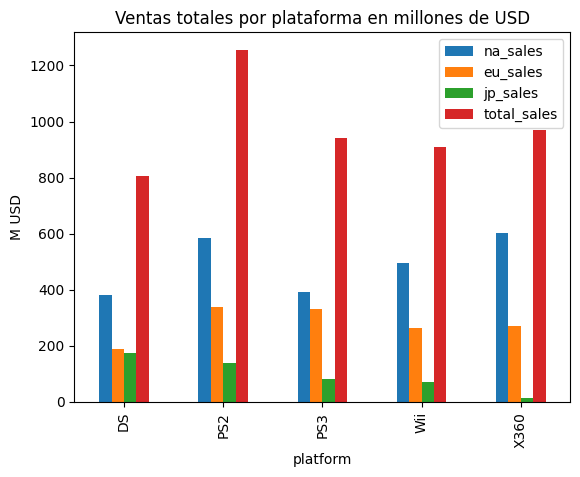

In [66]:
# Grafico de barras de ventas NA por plataforma en orden descendete
df_top_5_platforms_by_na_eu_jp_sales_group_reset.plot(x='platform',
                                                      kind='bar',
                                                      title='Ventas totales por plataforma en millones de USD',
                                                      ylabel='M USD',)
plt.show()

---
**Observaciones**

* Para cada región (NA, EU, JP) las cinco plataformas principales son:
 * DS
 * PS2
 * PS3
 * Wii
 * X360
* Describe las variaciones en sus cuotas de mercado de una región a otra.
 * NA: Mayoria de ventas
 * EU: Segundo lugar en ventas
 * JP: La meno cantidad de ventas
---

### Cinco generos principales  NA, EU, JP

In [67]:
s_total_sales_by_genre = df_g_c.groupby('genre').sum()['total_sales']
s_total_sales_by_genre_sorted = s_total_sales_by_genre.sort_values(ascending=False)

l_top_5_genres_by_total_sales = s_total_sales_by_genre_sorted[0:5].index.tolist()

display( l_top_5_genres_by_total_sales )

# Filtrado de dataframe en base a las plataformas con mayores ventas
df_top_5_genres_by_na_eu_jp_sales = df_g_c[df_g_c['genre'].isin(l_top_5_genres_by_total_sales)][['genre',
                                                                                                 'na_sales',
                                                                                                 'eu_sales',
                                                                                                 'jp_sales',
                                                                                                 'total_sales']].copy()
df_top_5_genres_by_na_eu_jp_sales_group = df_top_5_genres_by_na_eu_jp_sales.groupby('genre').sum()

# Se resetea el indice para remover el multiindice
df_top_5_genres_by_na_eu_jp_sales_group_reset = df_top_5_genres_by_na_eu_jp_sales_group.reset_index()

display( df_top_5_genres_by_na_eu_jp_sales_group_reset )

['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,879.01,519.13,161.43,1744.17
1,Platform,445.50,200.35,130.83,827.77
2,Role-Playing,330.81,188.71,355.41,934.56
3,Shooter,592.24,317.34,38.76,1052.45
4,Sports,684.43,376.79,135.54,1331.27


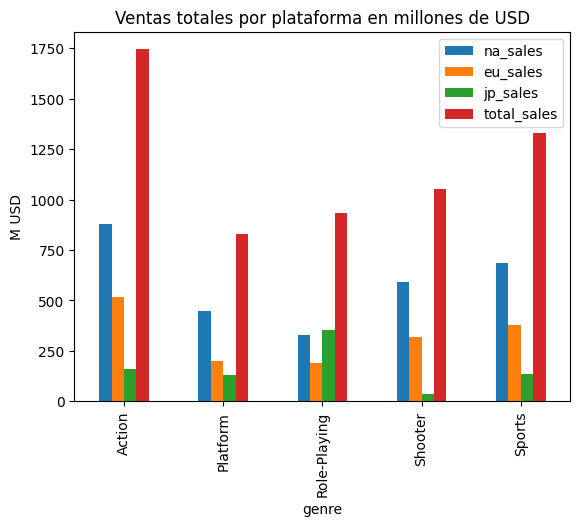

In [68]:
# Grafico de barras de ventas NA por plataforma en orden descendete
df_top_5_genres_by_na_eu_jp_sales_group_reset.plot(x='genre',
                                                   kind='bar',
                                                   title='Ventas totales por plataforma en millones de USD',
                                                   ylabel='M USD',)
plt.show()

---
**Observaciones**

* Los cinco géneros principales para cada región (NA, EU, JP) son:
 * Action
 * Platform
 * Role-playing
 * Shooter
 * Sports
* Explica la diferencias:
 * NA: Sus ventas son mayritarias en la mayoria de los generos visualizados, a excepcion de Rol-playing que estan en 2o lugar
 * EU: Sus ventas van en segundo lugar en la mayoria de los generos visualizados, a excepcion de Rol-playing que estan en 3r lugar
 * JP: Sus ventas son minoritarias en la mayoria de los generos visualizados, a exepcion de Rol-playing, que estan en primer lugar  
---

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [69]:
df_platform_rating = df_g_c[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales', 'rating']].copy()
df_platform_rating_PS2 = df_platform_rating[df_platform_rating['platform'] == 'PS2']
df_platform_rating_PS2_f = df_platform_rating_PS2[df_platform_rating['rating'] != 'unknown']

df_platform_rating_PS2_f_group = df_platform_rating_PS2_f.groupby('rating').sum()

# Se resetea el indice para remover el multiindice
df_platform_rating_PS2_f_group_reset = df_platform_rating_PS2_f_group.reset_index()

display( df_platform_rating_PS2_f_group_reset )

/tmp/ipykernel_50/2558718017.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_platform_rating_PS2_f = df_platform_rating_PS2[df_platform_rating['rating'] != 'unknown']


,rating,na_sales,eu_sales,jp_sales,total_sales
0,E,206.09,116.03,18.38,406.94
1,E10+,32.41,12.78,2.28,60.49
2,EC,0.12,0.09,0.00,0.24
3,M,103.55,55.65,14.16,206.85
4,T,183.23,107.27,43.58,387.61


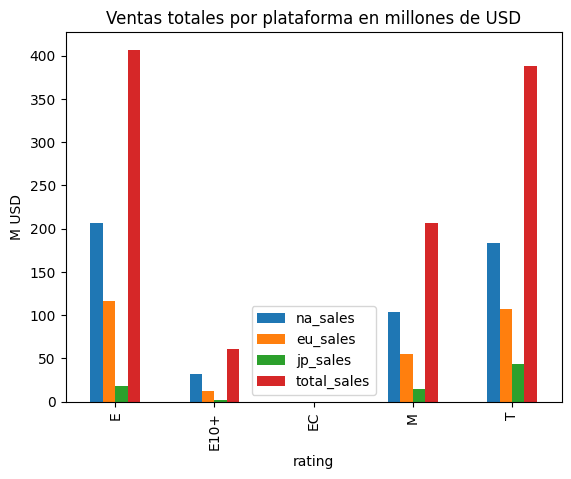

In [70]:
# Grafico de barras de ventas NA por plataforma en orden descendete
df_platform_rating_PS2_f_group_reset.plot(x='rating',
                                          kind='bar',
                                          title='Ventas totales por plataforma en millones de USD',
                                          ylabel='M USD',)
plt.show()

---
**Observaciones**

* La clasificacion ESRB por orden ventas totales en orden descendente:
 * E
 * T
 * M
 * E10+
 * EC
* Diferencias entre regiones
 * NA: Es la region que tiene el primer lugar en ventas totales
 * EU: Cuenta con el segundo lugar en ventas totales
 * JP: Se encuentra en el tercer lugar en venras totales
---

### Conclusiones generales paso 4

* Las cinco plataformas principales por region (NA, EU, JP) son:
 * DS
 * PS2
 * PS3
 * Wii
 * X360
* Describe las variaciones en sus cuotas de mercado de una región a otra.
 * NA: Mayoria de ventas
 * EU: Segundo lugar en ventas
 * JP: La meno cantidad de ventas
---
* Los cinco generos principales NA, EU, JP son:
 * Action
 * Platform
 * Role-playing
 * Shooter
 * Sports
* Explica la diferencia:
 * NA: Sus ventas son mayritarias en la mayoria de los generos visualizados, a excepcion de Rol-playing que estan en 2o lugar
 * EU: Sus ventas van en segundo lugar en la mayoria de los generos visualizados, a excepcion de Rol-playing que estan en 3r lugar
 * JP: Sus ventas son minoritarias en la mayoria de los generos visualizados, a exepcion de Rol-playing, que estan en primer lugar
---
* La clasificacion ESRB por orden ventas totales en orden descendente:
 * E
 * T
 * M
 * E10+
 * EC
* Diferencias entre regiones
 * NA: Es la region que tiene el primer lugar en ventas totales
 * EU: Cuenta con el segundo lugar en ventas totales
 * JP: Se encuentra en el tercer lugar en venras totales

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Raul has logrado identificar claramente las diferencias entre América del Norte, Europa y Japón, no solo en términos de plataformas y géneros predominantes, sino también en la influencia de las clasificaciones ESRB, lo que refleja tu capacidad para conectar datos con tendencias culturales y de comportamiento. 

</div>

## Paso 5: Prueba de hipotesis estadistica:

* Hipotesis
 * Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
 * Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
* Establece tu mismo el valor de umbral alfa.
* Explica:
 * Cómo formulaste las hipótesis nula y alternativa.
 * Qué criterio utilizaste para probar las hipótesis y por qué.

### Hipotesis de calificaciones promedio de usuarios para plataformas

* H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
* H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son dferentes.

In [71]:
# Se crea el dataframe df_u_score_t_sales a partir de df_g_c
df_platform_u_score = df_g_c[['platform', 'user_score']].copy()

df_platform_u_score_XOne = df_platform_u_score[(df_platform_u_score['platform'] == 'XOne') & (df_platform_u_score['user_score'] != -1)]['user_score'].copy()
df_platform_u_score_PC   = df_platform_u_score[(df_platform_u_score['platform'] == 'PC') & (df_platform_u_score['user_score'] != -1)]['user_score'].copy()

# Establece un nivel crítico de significación estadística
alpha = 0.05

# Prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
results = st.ttest_ind(df_platform_u_score_XOne, df_platform_u_score_PC, equal_var=False)

# Imprime el valor p obtenido
print('Valor p:', results.pvalue)

# Compara los valores p obtenidos con el nivel de significación estadística
if results.pvalue <= alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p: 4.935072360183574e-06
Rechazamos la hipótesis nula


---
**Observaciones**

* El valor de umbral alpha utilizado: 0.05
* Se formulo la hipotesis nula como que no existe una diferencia y la hipotesis alternatva, de que exite una diferencia.
* El criterio empleado fue una prueba de dos colas, ya que como es una diferencia, esta difrencia puede ser en cualquiera de los dos extremos de la curva.
* Se rechaza la hipotesis nula
---

### Hipotesis de calificaciones promedio de usuarios para generos

* H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
* H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [72]:
# Se crea el dataframe df_u_score_t_sales a partir de df_g_c
df_genre_u_score= df_g_c[['genre', 'user_score']].copy()

df_genre_u_score_Action = df_genre_u_score[(df_genre_u_score['genre'] == 'Action') & (df_genre_u_score['user_score'] != -1)]['user_score'].copy()
df_genre_u_score_Sports   = df_genre_u_score[(df_genre_u_score['genre'] == 'Sports') & (df_genre_u_score['user_score'] != -1)]['user_score'].copy()

# Establece un nivel crítico de significación estadística
alpha = 0.05

# Prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
results = st.ttest_ind(df_genre_u_score_Action, df_genre_u_score_Sports, equal_var=False)

# Imprime el valor p obtenido
print('Valor p:', results.pvalue)

# Compara los valores p obtenidos con el nivel de significación estadística
if results.pvalue <= alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p: 0.11483818791498286
No podemos rechazar la hipótesis nula


---
**Observaciones**

* El valor de umbral alpha utilizado: 0.05
* Se formulo la hipotesis nula como que no existe una diferencia y la hipotesis alternatva, de que exite una diferencia.
* El criterio empleado fue una prueba de dos colas, ya que como es una diferencia, esta difrencia puede ser en cualquiera de los dos extremos de la curva.
* No se rechaza la hipotesis nula 
---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Raul aplicaste correctamente las prueba de hipótesis comparando las distribuciones dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto servirá para tener una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

### Conclusiones generales paso 5

* En ambos casos se utilizo:
 * En ambos casos, el valor de umbral alpha fue de: 0.05
 * Se formulo la hipotesis nula como que no existe una diferencia y la hipotesis alternatva, de que exite una diferencia.
 * El criterio empleado fue una prueba de dos colas, ya que como es una diferencia, esta difrencia puede ser en cualquiera de los dos extremos de la curva.
---
* En el primer caso, se rechaza la hipotesis nula
* En el segundo caso, no se rechaza la hipotesis nula